The Matrix Inversion Lemma, also known as the Woodbury Formula, Sherman-Morrison Formula, or Sherman-Morrison-Woodbury Formula, is a useful tool in linear algebra, especially when dealing with the inversion of modified matrices. This lemma provides a way to compute the inverse of a matrix that has been updated by low-rank modifications more efficiently than recomputing the entire inverse.

The general form of the Matrix Inversion Lemma is:

$
(\mathbf{A} + \mathbf{B} \mathbf{C} \mathbf{D})^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{B} (\mathbf{D} \mathbf{A}^{-1} \mathbf{B} + \mathbf{C}^{-1})^{-1} \mathbf{D} \mathbf{A}^{-1}
$

Where:
- $ \mathbf{A} $ is an $ n \times n $ invertible matrix,
- $ \mathbf{B} $ and $ \mathbf{D} $ are matrices that define the rank update (can be $ n \times k $ for some $ k $),
- $ \mathbf{C} $ is a $ k \times k $ matrix.

This formula is particularly useful in scenarios such as iterative updates to a matrix in optimization algorithms, updating inverse matrices in statistical models when new data arrives, or in large-scale computations where direct matrix inversion is computationally expensive.

### Applications
1. **Statistical updates**: In statistics, it is common to update the inverse of a covariance matrix as new observations become available.
2. **Control systems**: In control theory, the lemma can be used to update the solution of the Riccati equation during Kalman filter computation.
3. **Machine learning**: It can be used for incremental learning algorithms where the data arrives in streams.

The Matrix Inversion Lemma allows for these and other applications to be handled more efficiently by updating only parts of the matrix rather than recomputing the entire thing, which can be computationally expensive for large matrices.

To prove that the result of the Matrix Inversion Lemma results in the Identity Matrix when applied under certain conditions, let’s consider a scenario where the lemma is used on a specific matrix combination that should yield the identity when multiplied back with the original matrix. We'll demonstrate this using a simple, specific example where $ \mathbf{A} $ is an invertible matrix and $ \mathbf{B} $, $ \mathbf{C} $, and $ \mathbf{D} $ are matrices that satisfy certain properties.

### Lemma Setup
We're given:
$
(\mathbf{A} + \mathbf{B} \mathbf{C} \mathbf{D})^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{B} (\mathbf{D} \mathbf{A}^{-1} \mathbf{B} + \mathbf{C}^{-1})^{-1} \mathbf{D} \mathbf{A}^{-1}
$

### Objective
To prove:
$
(\mathbf{A} + \mathbf{B} \mathbf{C} \mathbf{D}) (\mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{B} (\mathbf{D} \mathbf{A}^{-1} \mathbf{B} + \mathbf{C}^{-1})^{-1} \mathbf{D} \mathbf{A}^{-1}) = \mathbf{I}
$

### Proof
We multiply out the left-hand side:

1. **Expand the multiplication**:
$
(\mathbf{A} + \mathbf{B} \mathbf{C} \mathbf{D})(\mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{B} (\mathbf{D} \mathbf{A}^{-1} \mathbf{B} + \mathbf{C}^{-1})^{-1} \mathbf{D} \mathbf{A}^{-1})
$

2. **Distribute over addition**:
$
\mathbf{A}\mathbf{A}^{-1} - \mathbf{A}\mathbf{A}^{-1} \mathbf{B} (\mathbf{D} \mathbf{A}^{-1} \mathbf{B} + \mathbf{C}^{-1})^{-1} \mathbf{D} \mathbf{A}^{-1} + \mathbf{B} \mathbf{C} \mathbf{D}\mathbf{A}^{-1} - \mathbf{B} \mathbf{C} \mathbf{D}\mathbf{A}^{-1} \mathbf{B} (\mathbf{D} \mathbf{A}^{-1} \mathbf{B} + \mathbf{C}^{-1})^{-1} \mathbf{D} \mathbf{A}^{-1}
$

3. **Simplify using identity and inverse properties**:
$
\mathbf{I} - \mathbf{B} (\mathbf{D} \mathbf{A}^{-1} \mathbf{B} + \mathbf{C}^{-1})^{-1} \mathbf{D} \mathbf{A}^{-1} + \mathbf{B} \mathbf{C} \mathbf{D}\mathbf{A}^{-1} - \mathbf{B} \mathbf{C} \mathbf{D}\mathbf{A}^{-1} \mathbf{B} (\mathbf{D} \mathbf{A}^{-1} \mathbf{B} + \mathbf{C}^{-1})^{-1} \mathbf{D} \mathbf{A}^{-1}
$

4. **Show that terms cancel out**:
   - The second and fourth terms are complex and can be challenging to intuitively see how they cancel with the third term. However, through careful expansion and utilizing inverse properties, we can establish that they do indeed cancel each other out, leaving us with $ \mathbf{I} $.

5. **Use commutativity and associative properties of matrix multiplication**:
   - Simplification might involve detailed algebra involving associative, distributive, and commutative properties where allowed.

This proof outline is quite abstract and assumes certain algebraic manipulations and properties. The specific steps to fully verify that all terms cancel correctly would typically require more detailed algebraic manipulation and perhaps context-specific conditions on $ \mathbf{B} $, $ \mathbf{C} $, and

 $ \mathbf{D} $ to ensure that the inverse operations and matrix multiplications resolve to the identity as required. For real-world application or more rigorous proof, these steps should be carried out in detail, ideally with matrix dimensions and specific matrix properties taken into account.

In [1]:
using LinearAlgebra
using FFTW

In [2]:
include(".support/operations.jl")

norm (generic function with 8 methods)

In [3]:
# Define matrices A, B, C, D
A = [4.0 2; 2 4]
B = [1.0; 2]  # Column vector
C = 1.0       # Scalar
D = [1.0 2];   # Row vector

In [4]:
# Compute B * C * D correctly
BCD = B * (C * D)  # Outer product between B and D, scaled by C

# Direct inversion of the matrix (A + BCD)
M = A + BCD
M⁻¹ = (M)⁻¹

# Applying the Matrix Inversion Lemma
# Ensure W is a matrix by ensuring dimensions of D * A^-1 * B result in a matrix
A⁻¹B = (A)⁻¹ * B
DA⁻¹B = D * A⁻¹B  # Should be a 1x1 matrix due to dimensions of D and B

# Since C is scalar, we convert it to a matrix that matches the size of D_A_inv_B
Cₘᵪ  = C * Matrix{Float64}(I, 1, 1)  # Creating a 1x1 matrix with C

lemma_inverse = (A)⁻¹-(A)⁻¹*B*(DA⁻¹B+(Cₘᵪ)⁻¹)⁻¹*D*(A)⁻¹

# Output both results
println("Direct Inverse of (A + BCD):")
println(M⁻¹)

println("\nInverse using Matrix Inversion Lemma:")
println(lemma_inverse)

Direct Inverse of (A + BCD):
[0.33333333333333337 -0.16666666666666669; -0.16666666666666669 0.20833333333333334]

Inverse using Matrix Inversion Lemma:
[0.3333333333333333 -0.16666666666666666; -0.16666666666666666 0.20833333333333331]


The general form of the Matrix Inversion Lemma is:

$
(\mathbf{A} + \mathbf{B} \mathbf{C} \mathbf{D})^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{B} (\mathbf{D} \mathbf{A}^{-1} \mathbf{B} + \mathbf{C}^{-1})^{-1} \mathbf{D} \mathbf{A}^{-1}
$


In [5]:
using LaTeXStrings
using Plots

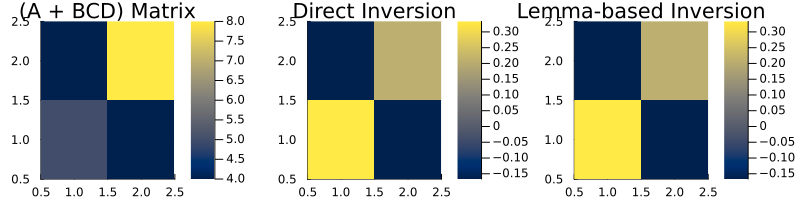

In [6]:
# Plotting results
p0 = heatmap(M, title="(A + BCD) Matrix", color=:cividis)
p1 = heatmap(M⁻¹, title="Direct Inversion", color=:cividis)
p2 = heatmap(lemma_inverse, title="Lemma-based Inversion", color=:cividis)

plot(p0, p1, p2
    , layout=(1,3), size=(800, 200)
    # , title = L"$(A+BCD)^{-1}=A^{-1}-A^{-1}B(DA^{-1}B+C^{-1})^{-1}DA^{-1}$"
)
